In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#reading csv file to a dataframe
data = pd.read_csv(r"/kaggle/input/nasa-nearest-earth-objects/neo.csv")
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
#checking for null values
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
#feature values
X = data.drop(['id','name','orbiting_body','sentry_object','hazardous'], axis=1)
X.head()


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09


In [7]:
#prediction values
Y=data['hazardous'].astype(int)
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: hazardous, dtype: int64

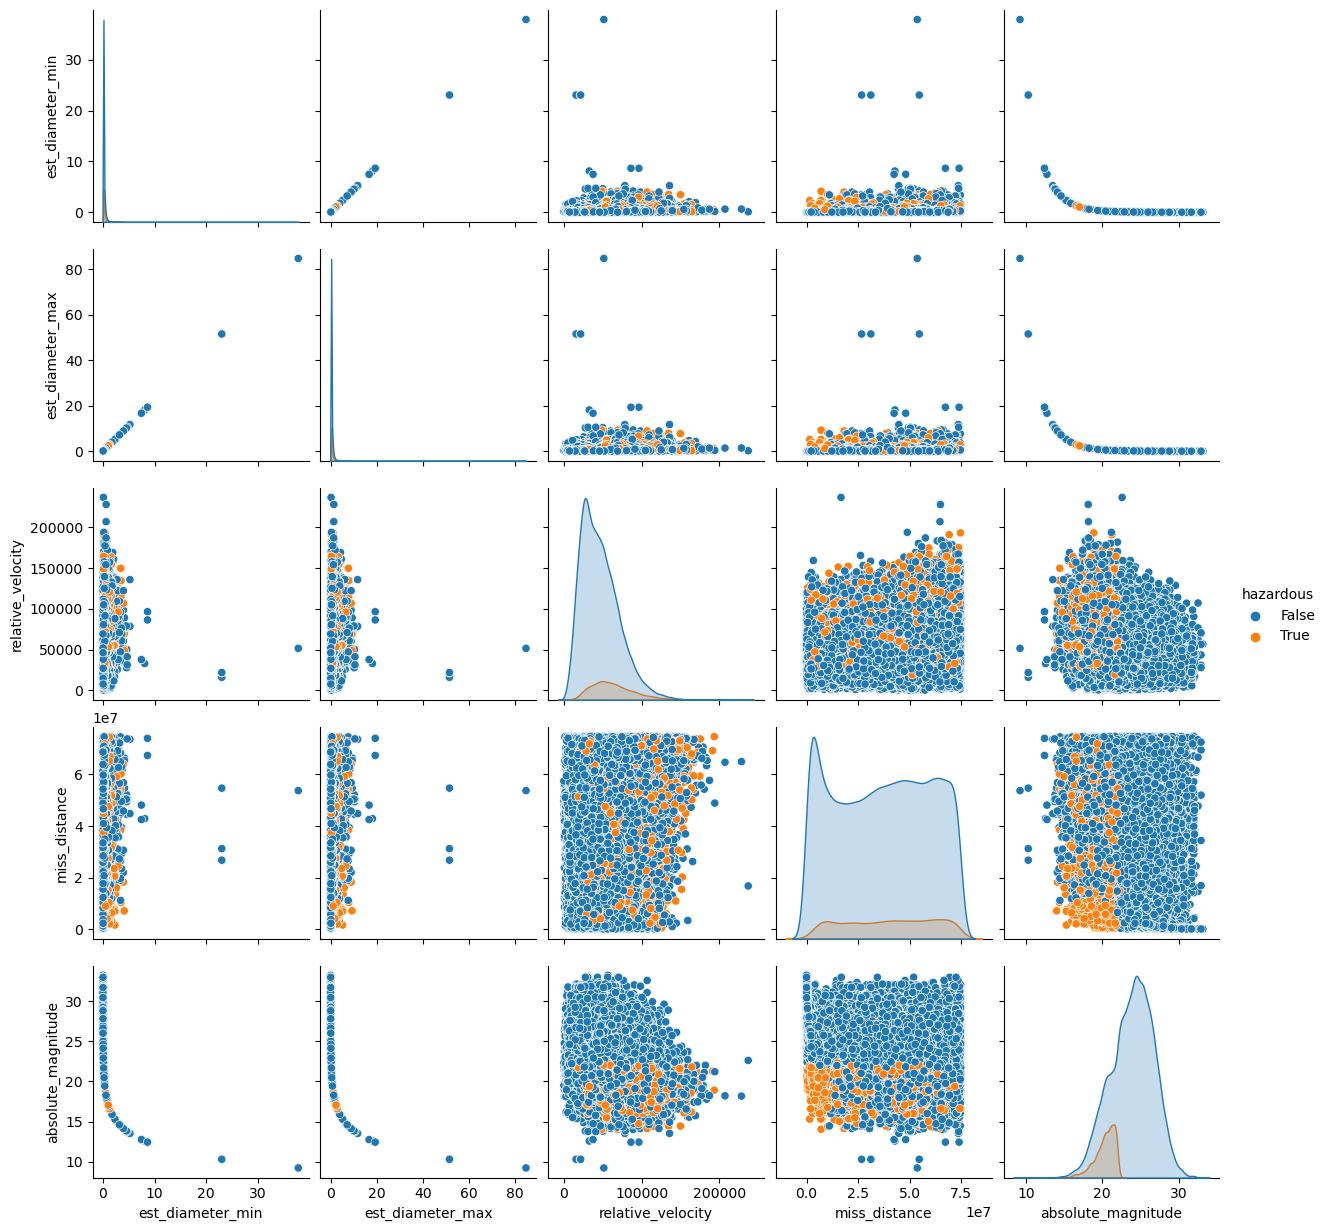

In [7]:
#data visualisation of the dataset
plot= data.drop(['id','name','orbiting_body','sentry_object'], axis=1)
sns.pairplot(plot,hue='hazardous')

In [9]:
#testTrainSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(63585, 5)
(27251, 5)
(63585,)
(27251,)


In [10]:
#scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

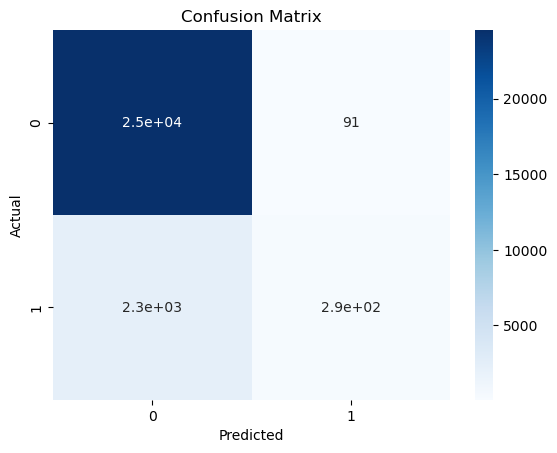



f1-score: 0.8793337680616452
precision: 0.8983051586935507
recall: 0.9106821768008514


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24615
           1       0.76      0.11      0.19      2636

    accuracy                           0.91     27251
   macro avg       0.84      0.55      0.57     27251
weighted avg       0.90      0.91      0.88     27251



In [10]:
#SVM model with RBF kernel
from sklearn import svm
from sklearn.metrics import recall_score,precision_score, f1_score, confusion_matrix,classification_report
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

#formation of confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#display of f1-score,prediction and recall
print("\n")
print("f1-score:",f1_score(Y_test, Y_pred, average='weighted'))
print("precision:",precision_score(Y_test, Y_pred, average='weighted'))
print("recall:",recall_score(Y_test,Y_pred,average='weighted'))
print("\n")
print(classification_report(Y_test,Y_pred))


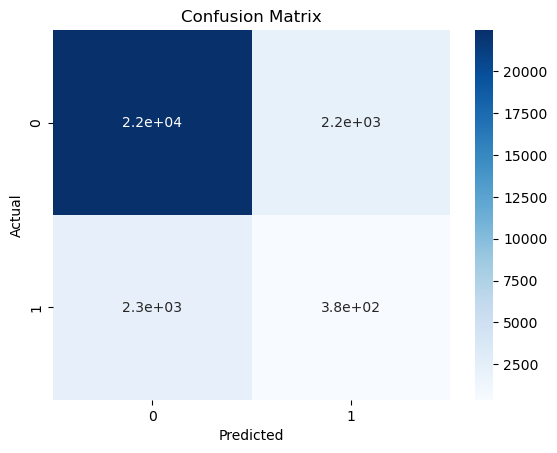



f1-score: 0.8366392879082761
precision: 0.8351996670592924
recall: 0.8380976844886426


              precision    recall  f1-score   support

           0       0.91      0.91      0.91     24615
           1       0.15      0.14      0.15      2636

    accuracy                           0.84     27251
   macro avg       0.53      0.53      0.53     27251
weighted avg       0.84      0.84      0.84     27251



In [11]:
#SVM model with SIGMOID kernel
from sklearn import svm
from sklearn.metrics import recall_score,precision_score, f1_score, confusion_matrix,classification_report
clf=svm.SVC(kernel='sigmoid')
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

#formation of confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#display of f1-score,prediction and recall
print("\n")
print("f1-score:",f1_score(Y_test, Y_pred, average='weighted'))
print("precision:",precision_score(Y_test, Y_pred, average='weighted'))
print("recall:",recall_score(Y_test,Y_pred,average='weighted'))
print("\n")
print(classification_report(Y_test,Y_pred))

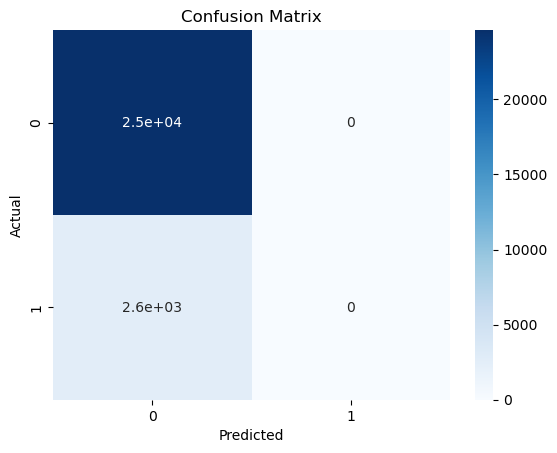



f1-score: 0.8573624849337277
precision: 0.8158959789287129
recall: 0.9032696047851455


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24615
           1       0.00      0.00      0.00      2636

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.82      0.90      0.86     27251



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

In [12]:
#SVM model with LINEAR kernel
from sklearn import svm
from sklearn.metrics import recall_score,precision_score, f1_score, confusion_matrix,classification_report
clf=svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

#formation of confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#display of f1-score,prediction and recall
print("\n")
print("f1-score:",f1_score(Y_test, Y_pred, average='weighted'))
print("precision:",precision_score(Y_test, Y_pred, average='weighted'))
print("recall:",recall_score(Y_test,Y_pred,average='weighted'))
print("\n")
print(classification_report(Y_test,Y_pred))

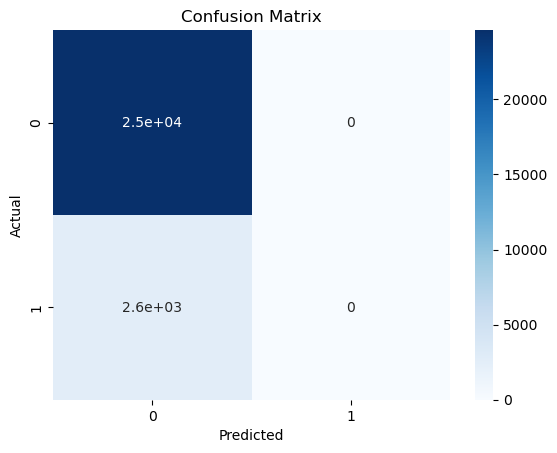



f1-score: 0.8573624849337277
precision: 0.8158959789287129
recall: 0.9032696047851455


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     24615
           1       0.00      0.00      0.00      2636

    accuracy                           0.90     27251
   macro avg       0.45      0.50      0.47     27251
weighted avg       0.82      0.90      0.86     27251



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

In [11]:
#SVM model with POLY kernel
from sklearn import svm
from sklearn.metrics import recall_score,precision_score, f1_score, confusion_matrix,classification_report
clf=svm.SVC(kernel='poly',degree=2)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

#formation of confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#display of f1-score,prediction and recall
print("\n")
print("f1-score:",f1_score(Y_test, Y_pred, average='weighted'))
print("precision:",precision_score(Y_test, Y_pred, average='weighted'))
print("recall:",recall_score(Y_test,Y_pred,average='weighted'))
print("\n")
print(classification_report(Y_test,Y_pred))